##코드 참고 - https://jxnjxn.tistory.com/49

In [3]:
#!pip install glove_python_binary

In [22]:
#pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from glove import Corpus, Glove
import pickle

In [3]:

data = pd.read_csv('mbig_댓글_라벨_띄어쓰기.csv',index_col=0)
tokens = pd.DataFrame(data['comment'])
tokens


,comment
0,이 거 그거 같다 그 분노의 질주 더 익스트림에서 샤를리즈 테론 사이퍼 이 좀비 타...
1,아니 ㅋㅋ 브레이크 등 왜 안 들어오냐고 아 ㅋㅋ
2,볼보운전자보다 제가 운전 경력 삼십년 가까이 됩니다그동안 대우차 현대차 쉐보레 차 ...
3,주차부터 멋지게 하셨네요
4,운전 실력 굳 국기 게양대 파워 클라스 인정
...,...
5307,자살할 용기면 죽이고 죽지
5308,대한민국 진짜 토 나온 다 어떻게 깨끗한 곳 하나 없냐
5309,여자는 군에서 아예 배재시 킵시 다 이런 일 예방하려면 사병이 든 부사관이든 장교든...
5310,군이나 경이나 ㅈㄹ 같다


In [4]:
from konlpy.tag import Okt
okt = Okt()
#okt.morphs(tokens['comment'][1])

In [6]:

train_token = []
for i in range(len(tokens)):
  train_token.append(okt.morphs(tokens['comment'][i]))
  #print(i)


In [7]:
train_token

[['이',
  '거',
  '그거',
  '같다',
  '그',
  '분노',
  '의',
  '질주',
  '더',
  '익스트림',
  '에서',
  '샤를',
  '리즈',
  '테론',
  '사이퍼',
  '이',
  '좀비',
  '타임',
  '하면서',
  '전부',
  '다',
  '폐차',
  '만들어',
  '놓은',
  '거'],
 ['아니', 'ㅋㅋ', '브레이크', '등', '왜', '안', '들어오냐고', '아', 'ㅋㅋ'],
 ['볼보',
  '운전자',
  '보다',
  '제',
  '가',
  '운전',
  '경력',
  '삼',
  '십년',
  '가까이',
  '됩니다',
  '그동안',
  '대우',
  '차',
  '현대차',
  '쉐보레',
  '차',
  '중형',
  '급',
  '신차',
  '만',
  '뽑아서',
  '운전',
  '해본',
  '결과',
  '외제차',
  '는',
  '무조건',
  '걸러',
  '야',
  '된다고',
  '봅니다',
  '사고',
  '시',
  '부품',
  '비',
  '인건비',
  '가',
  '타',
  '국산',
  '차',
  '에',
  '비해',
  '비쌉니다',
  '물론',
  '잘',
  '들',
  '아시겠지만',
  '국산',
  '차는',
  '해외',
  '수출',
  '용',
  '보다',
  '헉',
  '소리',
  '나오게',
  '국민',
  '들',
  '뒷북',
  '치',
  '게',
  '만드시는',
  '거',
  '알거에요',
  '그래도',
  '국내',
  '브랜드',
  '차량',
  '이',
  '써비스',
  '쎈',
  '타도',
  '많고',
  '부품',
  '준비',
  '돼',
  '있고',
  '외제차',
  '보다',
  '추천',
  '드립니',
  '다'],
 ['주차', '부터', '멋지게', '하셨네요'],
 ['운전', '실력', '굳', '국기', '게양', '대', '파워', '클라스', 

In [10]:
'''
data['token'] = train_token
data
data.to_csv('mbig_띄어쓰기_토큰.csv',encoding='utf-8-sig')
'''

In [11]:
corpus = Corpus()
corpus.fit(train_token,window=30)

In [12]:
#model
glove = Glove(no_components=128, learning_rate=0.005)
%time glove.fit(corpus.matrix, epochs=50,no_threads=4,verbose=False)
glove.add_dictionary(corpus.dictionary)

#save
#glove.save('glove_w20_epoch50.model') #14.4s
#glove.save('glove_w20_epoch100.model') #28.3s

Wall time: 32.1 s


In [14]:
glove.save('glove_w30_epoch50.model')
#load glove model
glove_model = Glove.load('glove_w30_epoch50.model')

In [15]:
# word dict 생성
word_dict = {}
for word in  glove_model.dictionary.keys():
    word_dict[word] = glove_model.word_vectors[glove_model.dictionary[word]]
print('[Success !] Lengh of word dict... : ', len(word_dict))

# save word_dict
with open('glove_word_dict_128.pickle', 'wb') as f:
    pickle.dump(word_dict, f)
print('[Success !] Save word dict!...')

[Success !] Lengh of word dict... :  13185
[Success !] Save word dict!...


In [16]:
word_dict

{'이': array([-0.26529128,  0.26147053,  0.27184486, -0.2652895 , -0.265439  ,
        -0.30075339,  0.19639745,  0.22448401, -0.17370858, -0.16872191,
        -0.28355053,  0.24828717,  0.16044942,  0.18596379,  0.14013999,
        -0.30335627, -0.22695199,  0.2973106 ,  0.29220754,  0.30351746,
        -0.31007211, -0.0435667 , -0.29205592,  0.1754889 , -0.13756372,
        -0.28134583,  0.30780118,  0.16092886,  0.28078928, -0.27241159,
         0.24138329,  0.10947663,  0.28599794, -0.28686481, -0.09945837,
        -0.13288404, -0.09795857, -0.18827219,  0.29710126,  0.21631473,
         0.2396801 ,  0.22378396, -0.25670488,  0.02601648, -0.30156248,
        -0.02534616,  0.20606973, -0.20274073, -0.23220773,  0.3078958 ,
         0.16426803,  0.21465396,  0.29544591, -0.26043745,  0.2490718 ,
         0.02144419, -0.3009968 , -0.32752763, -0.15086503, -0.19057342,
         0.29612792,  0.27013644, -0.28425484,  0.2644629 , -0.04732943,
         0.26353838,  0.2001232 , -0.30592189,

In [98]:
word_dict.keys()

dict_keys(['현재', '호텔', '주인', '심정', '아', '18', '난', '마른하늘', '에', '날벼락', '맞고', '망하게', '생겼는데', '누', '군', '계속', '추모', '받네', '못', '된', '넘', '들', '남', '의', '고통', '을', '즐겼던', '들이', '젠', '마땅한', '처벌', '받아야지', '그', '래야', '공정한', '사회', '지', '심은대로', '거두거라', '1', '사람', '얼굴', '손톱', '으로', '긁은것은', '인격', '살해', '이고', '2', '동영상', '이', '몰카', '냐', '메걸', '리안', '생각', '없노', '100년', '안에', '남녀', '간', '성', '전쟁', '한번', '크게', '치룬', '후', '일부다처제', '여성', '정치', '참여', '금지', '투표', '권', '삭제', '가', '세계', '공통', '문화', '로', '자리', '잡을듯', '암탉', '너무', '울어', '댐', '180', '이하', '호빗', '한남', '은', '결혼', '하지마', '셈', 'ㅋ', '돈', '없으면', '연애', '도', '니', '유전자', '받아서', '받을', '네', '후손', '뭔', '죄임', '키', '감량', '을해', '야', '박수', '쳐주지', '그냥', '먹고', '싶은거다', '먹고디', '비져', '자고', '하', '면', '로는', '쪄', '230', '대', '골빈', '여자', '기사', '다', '모이는', '건가', 'ㅋㅋㅋㅋ', '이래서', '는', '주면', '안된다', '엠넷', '사전투표', '나', '하고', '살아야지', '계집', '2006년', '포도', '밭', '사나이', '에서', '흰가운', '입은', '연구원', '정소영', '봐라', '솔', '까', '대한민국', '여배우', '중', '최고', '이쁘고', '단아', '했다', '급식', '충', '멋', 

In [67]:
'''
#새로운 테스트 데이터 임베딩 시
# word dict : train데이터의 임베딩 사전
total_word_dict = {}
cnt = 0

for word in test_token:
    if word in word_dict.keys():
        total_word_dict[word] = word_dict[word]
    else:
        word_dict[word] = np.zeros((128))
        cnt += 1  # 처음 본 단어 갯수 세기

print('no train word -> 0....', cnt)
print('token -> word embedding....!',len(unique_tokens))
'''

TypeError: unhashable type: 'list'

In [17]:
test_token = train_token

def sent2vec_glove(tokens, embedding_dim=128):
    #문장 token 리스트를 받아서 임베딩 시킨다
  
    size = len(tokens)
    matrix = np.zeros((size, embedding_dim))
    word_table = word_dict     # glove word_dict

    for i, token in enumerate(tokens):
        vector = np.array([
            word_table[t] for t in token
            if t in word_table
        ])

        if vector.size != 0:
            final_vector = np.mean(vector, axis=0)
            matrix[i] = final_vector

    return matrix


#문장 임베딩
sentence_glove = sent2vec_glove(test_token)
sentence_glove.shape

(5312, 128)

In [18]:
# sklearn
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# clustering
dbscan = DBSCAN(eps=0.5)
#k = 20
#kmeans = KMeans(n_clusters=k, random_state=2021).fit(sentence_glove)
#y_pred = kmeans.fit_predict(sentence_glove)
#y_pred = kmeans.labels_
y_pred = dbscan.fit_predict(sentence_glove)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
len(y_pred)

5664

In [21]:
# tsne
tsne = TSNE(verbose=1, perplexity=100, random_state=2021)   # perplexity : 유사정도
X_embedded = tsne.fit_transform(sentence_glove)
print('Embedding shape 확인', X_embedded.shape)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 5312 samples in 0.297s...
[t-SNE] Computed neighbors for 5312 samples in 3.830s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5312
[t-SNE] Computed conditional probabilities for sample 2000 / 5312
[t-SNE] Computed conditional probabilities for sample 3000 / 5312
[t-SNE] Computed conditional probabilities for sample 4000 / 5312
[t-SNE] Computed conditional probabilities for sample 5000 / 5312
[t-SNE] Computed conditional probabilities for sample 5312 / 5312
[t-SNE] Mean sigma: 0.009868
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.664665
[t-SNE] KL divergence after 1000 iterations: 0.424113
Embedding shape 확인 (5312, 2)


In [23]:
#X_embedded

array([[-19.179502, -14.616597],
       [-40.24852 , -16.819965],
       [ 23.618862, -33.55902 ],
       ...,
       [ 35.24004 , -12.766662],
       [ 19.38374 , -37.438507],
       [ 33.65274 , -14.60445 ]], dtype=float32)

In [22]:
tsne = pd.DataFrame(X_embedded)
#tsne.to_csv('mbig_glove_tsne.csv',encoding='utf-8-sig')
#tsne = pd.read_csv('mbig_glove_tsne.csv',index_col=0)
tsne

,0,1
0,-19.179502,-14.616597
1,-40.248520,-16.819965
2,23.618862,-33.559021
3,13.738192,39.750477
4,12.448126,40.825871
...,...,...
5307,19.913496,-36.687073
5308,34.126202,-7.058076
5309,35.240040,-12.766662
5310,19.383739,-37.438507


C:\Users\JAIEUN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


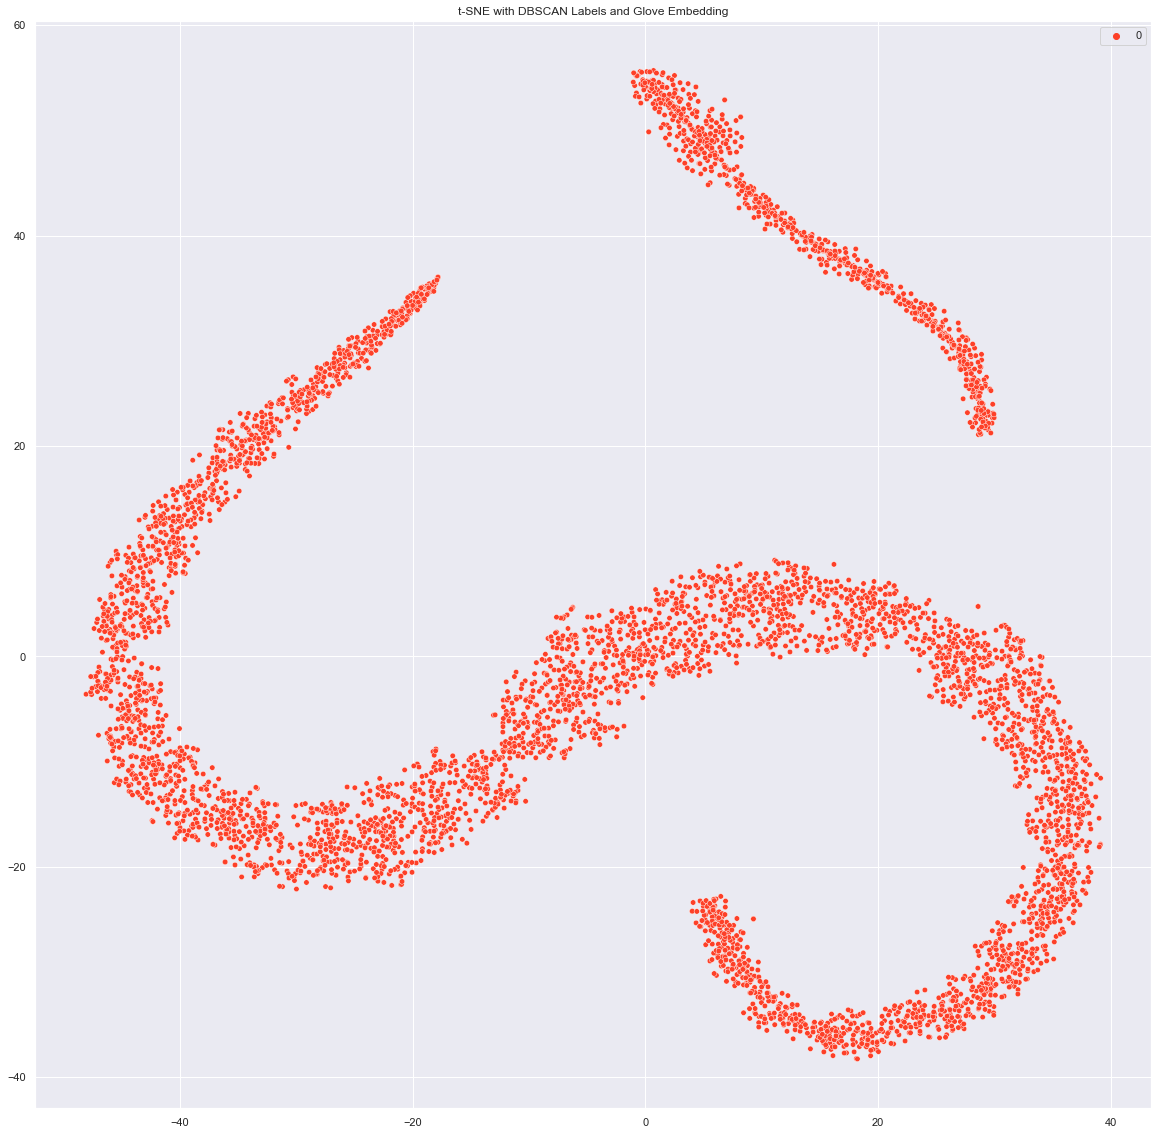

In [29]:
sns.set(rc={'figure.figsize':(20,20)})
# colors
#palette = sns.hls_palette(10, l=.4, s=.9) 
#palette = sns.color_palette('CMRmap_r',2)
# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred,
                legend='full',s=30,palette='CMRmap_r')

plt.title('t-SNE with DBSCAN Labels and Glove Embedding')
plt.savefig('glove_tsne_dbscan.png')
plt.show()

#plt.scatter(X_embedded[:,0], X_embedded[:,1],hue=y_pred,style=y_pred,s=5)
#plt.colorbar(shrink=0.7)

C:\Users\JAIEUN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


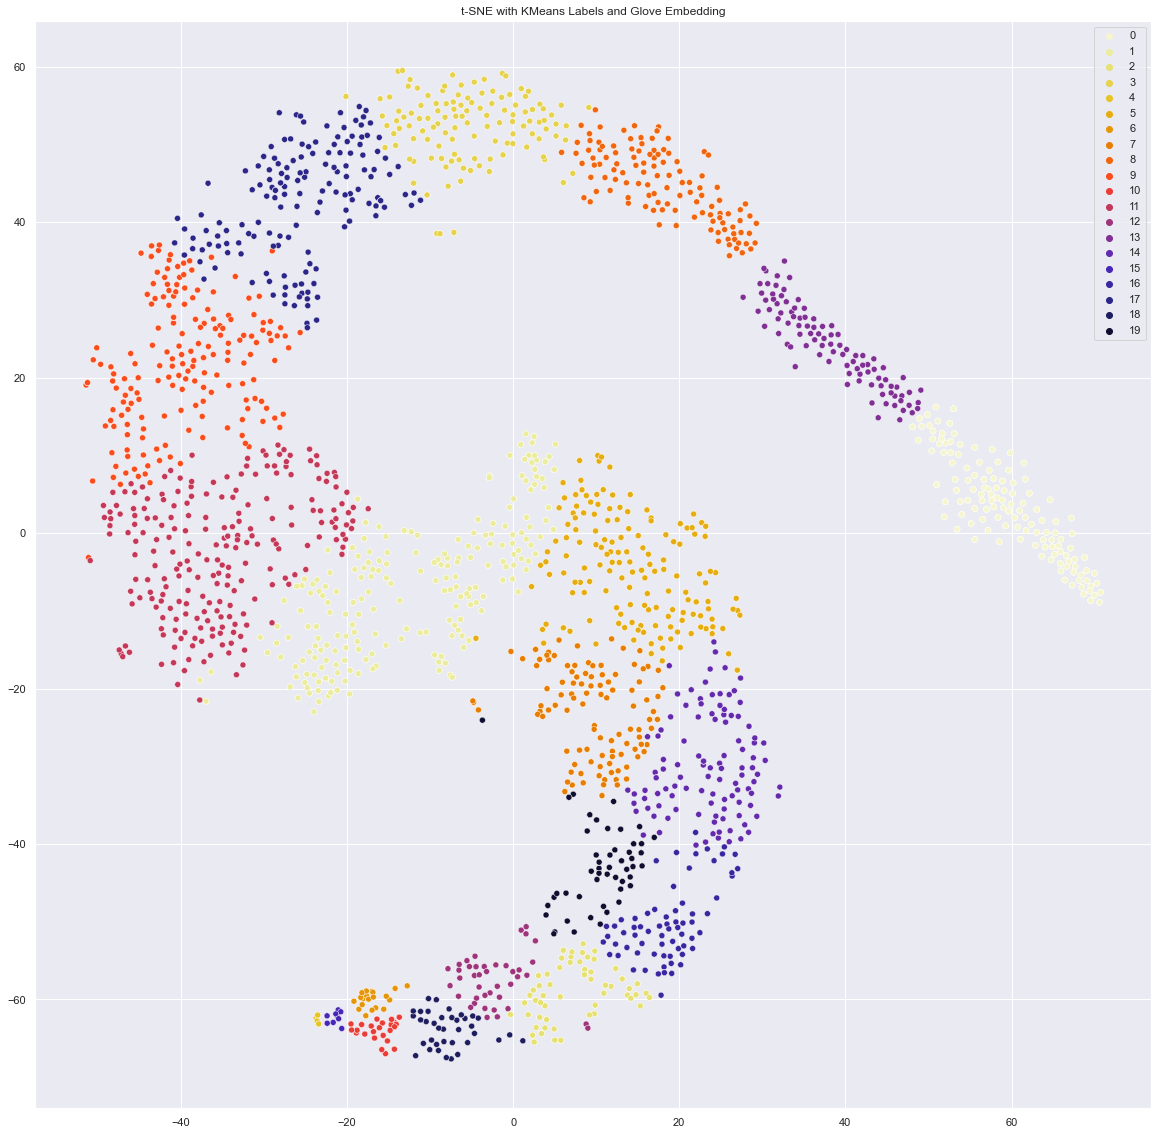

In [18]:
# 시각화
sns.set(rc={'figure.figsize':(20,20)})
# colors
#palette = sns.hls_palette(10, l=.4, s=.9) 
palette = sns.color_palette('CMRmap_r',20)
# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred,
                legend='full',palette=palette)     # kmeans로 예측

plt.title('t-SNE with KMeans Labels and Glove Embedding')
plt.savefig('tsne_glove_embedding_all.png')
plt.show()

In [19]:
data['cluster'] = y_pred
data

,comment,sentiment,cluster
0,이 거 그거 같다 그 분노의 질주 더 익스트림에서 샤를리즈 테론 사이퍼 이 좀비 타...,0.0,11
1,아니 ㅋㅋ 브레이크 등 왜 안 들어오냐고 아 ㅋㅋ,0.0,16
2,볼보운전자보다 제가 운전 경력 삼십년 가까이 됩니다그동안 대우차 현대차 쉐보레 차 ...,0.0,3
3,주차부터 멋지게 하셨네요,0.0,13
4,운전 실력 굳 국기 게양대 파워 클라스 인정,0.0,13
...,...,...,...
5659,최명숙 딱 봐도 님이 잼민이 같아 요 능지가,1.0,14
5660,최명숙 아니 행동하고 생각하는 게 잼민이 같다는 거에 요 이해력이 부족하신 듯,1.0,16
5661,잼민이 아니죠 어륜이죠,1.0,5
5662,누가 문재인 얼굴에다 계란 좀 던져줬으면 좋겠다,1.0,13


In [21]:
data.to_csv('glove_kmeans20_w20.csv',encoding='utf-8-sig')

In [132]:
print(data['comment'][data['cluster']==1]) #531개
print()
print(data['comment'][data['cluster']==2])
print()
print(data['comment'][data['cluster']==3])
print()
print(data['comment'][data['cluster']==4])

2       볼보운전자보다 제가 운전 경력 삼십년 가까이 됩니다그동안 대우차 현대차 쉐보레 차 ...
6                                               저기 우리 동넨데
8       수동 타는 데 현기차 고 수입차고 쌍용차 고 급발진 사고가 일어 나네요 너무 무섭다...
14                              키 햐급발진 나면 고객 탓 국내나 국외나 ㅋㅋ
15                   전기차를 타면 4226226 이렇게 될 수 있는 거니까 어떻게 탐
                              ...                        
5631                           ㅈ 까세요 말로 해서 안 되는 일도 있는 법이여
5633                                             문쪼잔뱅이는 쩝
5638                                           거지 같은 유튜버들
5646                            저 때 닭년 목아지를 비틀어버렸어야 되는 건데
5656                              어그로 장인 틀 딱 아 한글 교실 좀 가라
Name: comment, Length: 531, dtype: object

4       운전 실력 굳 국기 게양대 파워 클라스 인정
13                         2억 겨우
26             엄청나게 와 소름 무섭네요 ㅜㅜ
40                         중국산 끝
69                          무섭네요
                  ...           
5586                        ㅁㅊㅅㄲ
5603                     역시 똥 싼고
5614                           ㅗ
5649                  

In [145]:
print(data['comment'][(data['sentiment']==0)&(data['cluster']==1)])
print()
print(data['comment'][(data['sentiment']==1)&(data['cluster']==1)])

2       볼보운전자보다 제가 운전 경력 삼십년 가까이 됩니다그동안 대우차 현대차 쉐보레 차 ...
6                                               저기 우리 동넨데
8       수동 타는 데 현기차 고 수입차고 쌍용차 고 급발진 사고가 일어 나네요 너무 무섭다...
14                              키 햐급발진 나면 고객 탓 국내나 국외나 ㅋㅋ
15                   전기차를 타면 4226226 이렇게 될 수 있는 거니까 어떻게 탐
                              ...                        
2498     아니 못 배워 먹은 티를 꼭 나이 먹어서도 내야겠어 진짜 너무 하네 지도자가 맞는지 참
2590                                             왜 이러는 걸까
2601                                말로 해서 안 되니 계란 던지지 않을까
2603                아무리 정치인이 싫어도 칼로 얼굴 긁는 건 아니다 명백한 살인미수다
2648                바로 고소당하고 국정 윈 지하실로 끌려가서 온갖 고문은 다 당할 듯
Name: comment, Length: 267, dtype: object

2654                        안 전 따지지 말고 결함을 따져라 똥대가리 색히 들아
2662                                       와 근데 운전 ㅈㄴ 잘하네
2670    아이고 현대 기 아가 그러니깐 보란 듯이 차주한테 떠넘기네 나라꼬라지가 븅신같이 돌...
2671                                  ㅋㅋㅋㅋㅋㅋ 2억배상은 뭐야 미친년
2675    왜 항상 급발진은 거의 고령자 여성 운전자일까 그게 너무 궁금하다 젊은 남성 운전자...
                             

Found distortion for 2 clusters
Found distortion for 3 clusters
Found distortion for 4 clusters
Found distortion for 5 clusters
Found distortion for 6 clusters
Found distortion for 7 clusters
Found distortion for 8 clusters
Found distortion for 9 clusters
Found distortion for 10 clusters
Found distortion for 11 clusters
Found distortion for 12 clusters
Found distortion for 13 clusters
Found distortion for 14 clusters
Found distortion for 15 clusters
Found distortion for 16 clusters
Found distortion for 17 clusters
Found distortion for 18 clusters
Found distortion for 19 clusters
Found distortion for 20 clusters
Found distortion for 21 clusters
Found distortion for 22 clusters
Found distortion for 23 clusters
Found distortion for 24 clusters
Found distortion for 25 clusters
Found distortion for 26 clusters
Found distortion for 27 clusters
Found distortion for 28 clusters
Found distortion for 29 clusters
Found distortion for 30 clusters
Found distortion for 31 clusters
Found distortion f

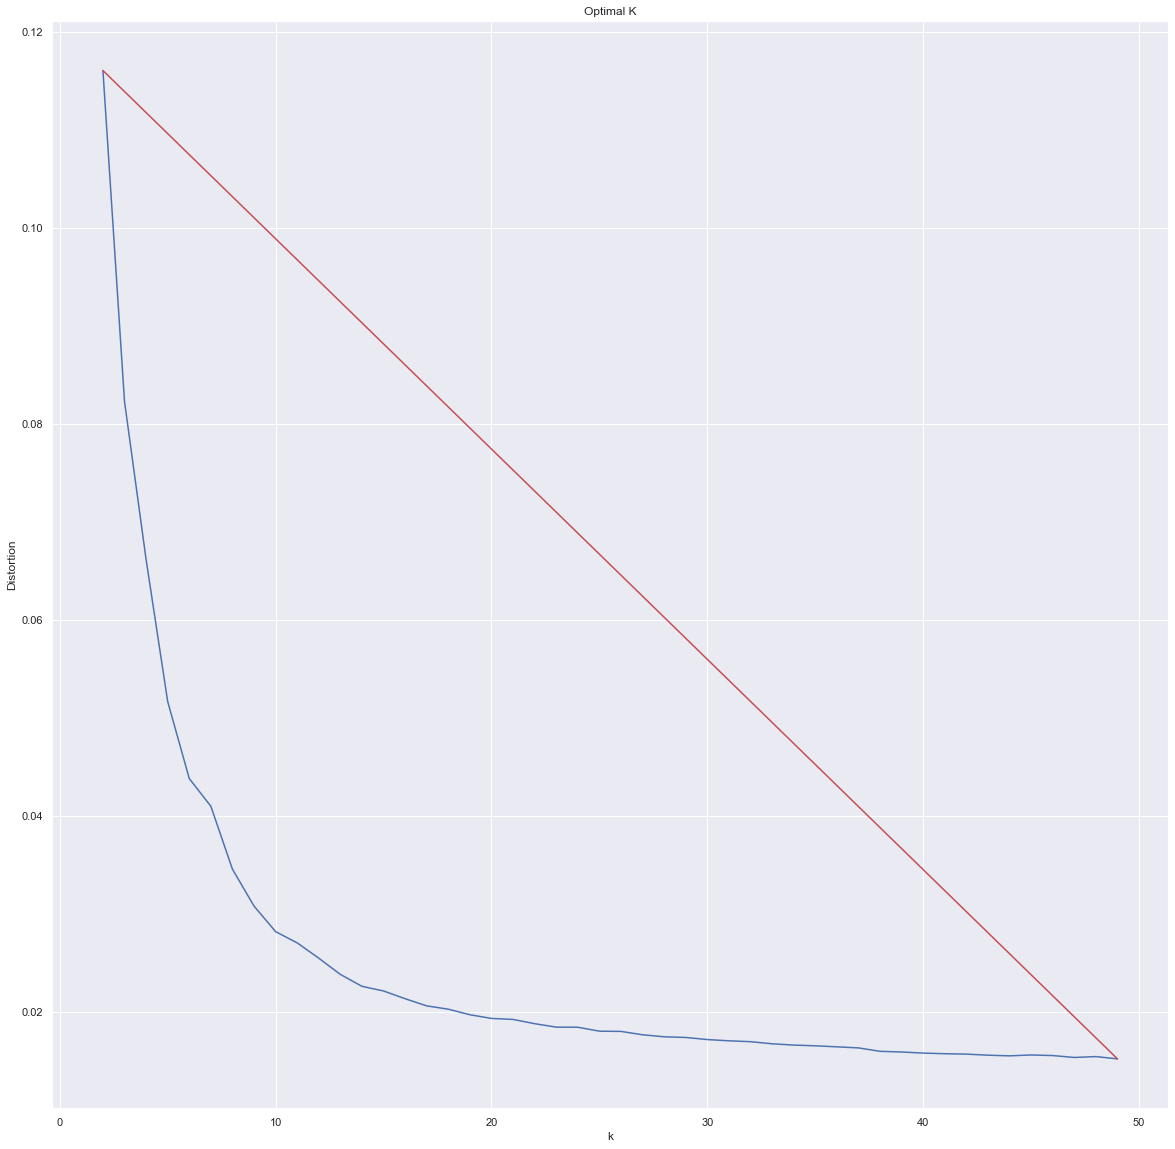

In [77]:

# 최적의 K 찾기 : 군집 갯수 k 찾기
from sklearn import metrics
from scipy.spatial.distance import cdist

# K=50 개의 클러스터에 대해서 시각화
distortions = []
K = range(2, 50)
#tqdm.pandas()

for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(sentence_glove)
    k_means.fit(sentence_glove)
    distortions.append(sum(np.min(cdist(sentence_glove, k_means.cluster_centers_, 'euclidean'), axis=1)) / sentence_glove.shape[0])
    
    print('Found distortion for {} clusters'.format(k))

# Visualization
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal K')
plt.show()